# 🧑🏻‍💼💳 Unemployment in India and Credit Card Spendings 

    Note: This notebook is the execution of an Data Collection and Pre-Procesing project.

### 1. Question

**Does the unemployment rate influence the use of credit card?**

- Stakeholders: 
  - Bank managers
  - Government for inflation control
  - Banks for credit risk control

Not already answered:  
Plausible:  
Answerable:  
Specific:  

In [64]:
import pandas as pd
from ydata_profiling import ProfileReport
from tabulate import tabulate

## 2. Load the data

We have data from two context:
- Unemployment in India
- Credit Card Spendings

In [65]:
df_spendings = pd.read_csv(r'.\kaggle\input\Credit_Card_Transactions_date_changed_with_missing_values.csv')
df_unemployment = pd.read_csv(r'.\kaggle\input\Unemployment in India.csv')

In [66]:
# Credit Card Spendings
df_spendings.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",2020-10-29,Gold,Bills,F,NaN
1,1,"Greater Mumbai, India",2019-08-22,Platinum,Bills,F,32555.0
2,2,"Bengaluru, India",2020-08-27,Silver,Bills,F,NaN
3,3,"Greater Mumbai, India",2019-04-12,Signature,Bills,F,123424.0
4,4,"Bengaluru, India",2020-05-05,Gold,Bills,F,171574.0


In [67]:
# Unemployment in India
df_unemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


-------------------------- Project Area --------------------------

### What to do

Spendings: 

- Add month column in spendings data
- Split the city from each City row
- Get a refdata to find the region of each city
- Drop column of index  

Unemployment:

- Add month column in unemployment data
- Drop missing values rows

## Describe the dataset


### Automaticly with ydata-profiling 🤖

In [68]:
# Spendings data
profile_spendings = ProfileReport(df_spendings,
                                  title='Credit card transactions - India - Simple',
                                  explorative=True)

# Unployment data
profile_unemployment = ProfileReport(df_unemployment,
                                     title='Unemployment in India',
                                     explorative=True)


# Save the reports
profile_unemployment.to_file(r'.\profiles\unemployment_data_profile.html',
                             silent=True)
profile_spendings.to_file(r'.\profiles\spendings_data_profile.html',
                          silent=True)

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 330.13it/s]


In [69]:
print(r'The spendings data profile is saved at: .\profiles\spendings_data_profile.html')
print(r'The unemployment data profile is saved at: .\profiles\unemployment_data_profile.html')

The spendings data profile is saved at: .\profiles\spendings_data_profile.html
The unemployment data profile is saved at: .\profiles\unemployment_data_profile.html


### Manually 🧑‍🔬

Credit Card Spendings

In [70]:
# Shape of dataset
print(f'Number of rows: {df_spendings.shape[0]}')
print(f'Number of null values: {df_spendings.isnull().sum().sum()}\n')

# Describe the numerical columns
print('Numerical columns description: ')
print(tabulate(df_spendings.describe().T.astype(int), headers='keys', tablefmt='pretty')) #type: ignore

# Describe the categorical columns
print('\nCategorical columns description: ')
print(tabulate(df_spendings.describe(include='object').T, headers='keys', tablefmt='pretty')) #type: ignore

Number of rows: 26052
Number of null values: 6689

Numerical columns description: 
+----------+-------+--------+--------+------+-------+--------+--------+--------+
|          | count |  mean  |  std   | min  |  25%  |  50%   |  75%   |  max   |
+----------+-------+--------+--------+------+-------+--------+--------+--------+
| df_index | 26052 | 13025  |  7520  |  0   | 6512  | 13025  | 19538  | 26051  |
|  Amount  | 23868 | 156836 | 103693 | 1005 | 77217 | 153539 | 228720 | 998077 |
+----------+-------+--------+--------+------+-------+--------+--------+--------+

Categorical columns description: 
+-----------+-------+--------+------------------+-------+
|           | count | unique |       top        | freq  |
+-----------+-------+--------+------------------+-------+
|   City    | 24358 |  986   | Bengaluru, India | 3323  |
|   Date    | 23241 |  730   |    2020-01-26    |  62   |
| Card Type | 26052 |   4    |      Silver      | 6840  |
| Exp Type  | 26052 |   6    |       Food       

Unemployment

In [71]:
# Shape of dataset
print(f'Number of rows: {df_unemployment.shape[0]}')
print(f'Number of null values: {df_unemployment.isnull().sum().sum()}\n')

# Describe the unemployment data
print('Numerical columns description: ')
print(tabulate(df_unemployment.describe().T.astype(int), headers='keys', tablefmt='pretty')) #type: ignore

# Describe the categorical columns
print('\nCategorical columns description: ')
print(tabulate(df_unemployment.describe(include='object').T, headers='keys', tablefmt='pretty')) #type: ignore

Number of rows: 768
Number of null values: 196

Numerical columns description: 
+-----------------------------------------+-------+---------+---------+-------+---------+---------+----------+----------+
|                                         | count |  mean   |   std   |  min  |   25%   |   50%   |   75%    |   max    |
+-----------------------------------------+-------+---------+---------+-------+---------+---------+----------+----------+
|     Estimated Unemployment Rate (%)     |  740  |   11    |   10    |   0   |    4    |    8    |    15    |    76    |
|           Estimated Employed            |  740  | 7204460 | 8087988 | 49420 | 1190404 | 4744178 | 11275489 | 45777509 |
| Estimated Labour Participation Rate (%) |  740  |   42    |    8    |  13   |   38    |   41    |    45    |    72    |
+-----------------------------------------+-------+---------+---------+-------+---------+---------+----------+----------+

Categorical columns description: 
+-----------+-------+--------+-

#### Appointments 📖

- Credit Card Spendings
  - Each row is a spending in a city in certain date
  - The column `City` has the name of country concatenated in the end
  - The column `Amount` is not normal distributed
  - The column `index` is not necessary

- Unemployment
  - The `Date` column has the end of month
  - Each row is a record of the unemployment data for a **certain month** in a **certain Indian region**
  - There are rows with complete missing values
    - The missing value maybe represent lack of data for two regions
  - The `Area` column separate the data between urban and rural
  - The column with unployment rate, `Estimated Unemployment Rate (%)`, is not normal distributed
    - The kurtois of 7.4 states that the distribution has a heavy tail and the value of 2.2 for skewness states that the distribution is not symmetric and is skewed to the right.
  - The columns has a leading space in the name

### Objective 🎯

The answer for the question could be a set of two graphs.

1. A scatter graph with **monthly unemployment rate in the x-axis** and the **monthly sum of credit card amount spent** in the y-axis. One for each region.
2. A line graph with months in the x-axis and two lines: one for the **monthly sum of credit card amount spent** and another for the **monthly unemployment rate**. One for each region.

The first graph allows to see if there is a correlation between the unemployment rate and the credit card spendings.  
The second graph allows to see the trend of the two variables.


Based on this, from the dataset, the most important information is concerning the columns of **date, region, unemployment rate and amount spent.**

### Identify the missing data 🕵️‍♂️

Unemployment

In [72]:
print(f'For the spendings data, the number of null values in each column is: ')
print(tabulate(df_spendings.isnull().sum().to_frame(), 
               headers='keys', tablefmt='pretty')) #type: ignore

print(f'\nFor the unemployment data, the number of null values in each column is: ')
print(tabulate(df_unemployment.isnull().sum().to_frame(), 
               headers='keys', tablefmt='pretty')) #type: ignore

For the spendings data, the number of null values in each column is: 
+-----------+------+
|           |  0   |
+-----------+------+
| df_index  |  0   |
|   City    | 1694 |
|   Date    | 2811 |
| Card Type |  0   |
| Exp Type  |  0   |
|  Gender   |  0   |
|  Amount   | 2184 |
+-----------+------+

For the unemployment data, the number of null values in each column is: 
+-----------------------------------------+----+
|                                         | 0  |
+-----------------------------------------+----+
|                 Region                  | 28 |
|                  Date                   | 28 |
|                Frequency                | 28 |
|     Estimated Unemployment Rate (%)     | 28 |
|           Estimated Employed            | 28 |
| Estimated Labour Participation Rate (%) | 28 |
|                  Area                   | 28 |
+-----------------------------------------+----+


As stated before, the unemployment dataset has missing values. 

The might be a lack of data for two regions.

In [73]:
( 
    df_unemployment
    .groupby(['Region', 'Area'])
    .agg(count=(' Date', 'count'))
    .reset_index()
    .pivot_table(index='Region', columns='Area', values='count', fill_value=0)
    .style.format('{:.0f}')
    .map(lambda x: 'background-color: #B8860B' if x < 14 else '')
)

Area,Rural,Urban
Region,,
Andhra Pradesh,14,14
Assam,12,14
Bihar,14,14
Chandigarh,0,12
Chhattisgarh,14,14
Delhi,14,14
Goa,12,12
Gujarat,14,14
Haryana,14,14


Actually, the missing values are not only in two regions, but in some of them and in both urban and rural areas.

One possible solution is to model the missing values with a regression algorithm and fill with the predicted values.

### Identify problems regarding data quality

##### Integrity constraints 

**Unemployment data**:  

- We should have unique month-year for each row  (Uniqueness)
- Percentage should be between 0 and 100  (Value Range)
- There should be only Urban and Rural as values for Area 

**Spendings data**:

- Amount should be positive and greater than 0 and not null (Value Range)
- Date should be filled
- City should be filled to allow integration with unemployment data

## Define an integrated data model

### ER Diagram

ERD

![20241111-20-55-02](imgs/20241111-20-55-02.png)

### 3.b Needed transformations to integrate the data

### Missing Values Treatment

Unemployment Dataset

Problems:
- ...

In [74]:
df_unemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [75]:
# Filter rows in Urban Area. This is due to the fact that the data is used for cross with credit card transactions data
df_unemployment = df_unemployment[df_unemployment['Area']=='Urban']

# Strip column names
df_unemployment.columns = df_unemployment.columns.str.strip()

# Drop columns
columns_to_remove = ['Area', 'Estimated Labour Participation Rate (%)', 'Estimated Employed', 'Frequency']
df_unemployment = (
    df_unemployment
    .drop(columns=columns_to_remove, errors='ignore')
)

# Remove skip line from records
df_unemployment = df_unemployment.map(lambda x: x.replace('\n', '') if isinstance(x, str) else x)


In [76]:
df_unemployment.head()

,Region,Date,Estimated Unemployment Rate (%)
373,Andhra Pradesh,31-05-2019,6.09
374,Andhra Pradesh,30-06-2019,3.80
375,Andhra Pradesh,31-07-2019,5.64
376,Andhra Pradesh,31-08-2019,4.61
377,Andhra Pradesh,30-09-2019,6.01


For some regions that have missing month data, we can insert it initially with null values for the unemployment rate.

In [77]:

# Define required dates
required_dates = [
    '31-05-2019', '30-06-2019', '31-07-2019', '31-08-2019',
    '30-09-2019', '31-10-2019', '30-11-2019', '31-12-2019',
    '31-01-2020', '29-02-2020', '31-03-2020', '30-04-2020',
    '31-05-2020', '30-06-2020'
]

# Convert required dates to datetime format
required_dates = pd.to_datetime(required_dates, format='%d-%m-%Y')

# Convert the 'Date' column to datetime format in the dataset
df_unemployment['Date'] = pd.to_datetime(df_unemployment['Date'], errors='coerce')

# Get the unique regions
unique_regions = df_unemployment['Region'].unique()

# Initialize a list to collect rows with missing dates
missing_dates_rows = []

# Check for missing dates in each region and add rows as needed
for region in unique_regions:
    region_data = df_unemployment[df_unemployment['Region'] == region]
    region_dates = region_data['Date'].unique()
    
    # Identify missing dates
    missing_dates = set(required_dates) - set(region_dates)
    
    # Create new rows for missing dates
    for missing_date in missing_dates:
        missing_dates_rows.append({
            'Region': region,
            'Date': missing_date,
            'Estimated Unemployment Rate (%)': None,
        })

# Convert missing dates list to a DataFrame and append to the original data
missing_dates_df = pd.DataFrame(missing_dates_rows)
df_unemployment = pd.concat([df_unemployment, missing_dates_df], ignore_index=True)

# Sort the data by Region and Date for better readability
df_unemployment = df_unemployment.sort_values(by=['Region', 'Date']).reset_index(drop=True)



C:\Users\ismae\AppData\Local\Temp\ipykernel_30564\3293365605.py:13: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_unemployment['Date'] = pd.to_datetime(df_unemployment['Date'], errors='coerce')
C:\Users\ismae\AppData\Local\Temp\ipykernel_30564\3293365605.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_unemployment = pd.concat([df_unemployment, missing_dates_df], ignore_index=True)


In [141]:
df_unemployment.head()

,Region,Date,Estimated Unemployment Rate (%)
0,Andhra Pradesh,2019-05-31,6.09
1,Andhra Pradesh,2019-06-30,3.80
2,Andhra Pradesh,2019-07-31,5.64
3,Andhra Pradesh,2019-08-31,4.61
4,Andhra Pradesh,2019-09-30,6.01


Then, we can use a regression model to predict the unemployment rate for the missing values.

In [83]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Load your data into df_unemployment (assuming this DataFrame is already defined)

# Convert Date to datetime format
df_unemployment['Date'] = pd.to_datetime(df_unemployment['Date'], errors='coerce')

# Sort by Region and Date to maintain order
df_unemployment = df_unemployment.sort_values(by=['Region', 'Date']).reset_index(drop=True)

# Initialize the Linear Regression model
model = LinearRegression()

# Store metrics results
mae_list = []
r2_list = []

# Apply imputation by region
regions = df_unemployment['Region'].unique()

for region in regions:
    # Select data for the current region
    region_data = df_unemployment[df_unemployment['Region'] == region]
    
    # Extract indices of missing and non-missing values
    missing_indices = region_data['Estimated Unemployment Rate (%)'].isna()
    non_missing_indices = ~missing_indices

    # Continue only if there are at least two known values to fit the model
    if non_missing_indices.sum() > 1:  # We need at least two points to fit a linear model
        # Prepare data for regression
        X = region_data.loc[non_missing_indices, 'Date'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
        y = region_data.loc[non_missing_indices, 'Estimated Unemployment Rate (%)'].values
        
        # Perform a 70-30 train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Fit the model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred_test = model.predict(X_test)
        
        # Calculate metrics on test data
        mae = mean_absolute_error(y_test, y_pred_test)
        r2 = r2_score(y_test, y_pred_test)
        
        # Append metrics to lists
        mae_list.append(mae)
        r2_list.append(r2)
        
        # Predict missing values if any
        if missing_indices.sum() > 0:
            X_missing = region_data.loc[missing_indices, 'Date'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
            y_pred_missing = model.predict(X_missing)
            
            # Assign predictions only for rows where `missing_indices` is True in `df_unemployment`
            df_unemployment.loc[region_data.index[missing_indices], 'Estimated Unemployment Rate (%)'] = y_pred_missing

# Calculate and display average metrics
print(f"Mean Absolute Error (MAE): {np.mean(mae_list):.4f}")
print(f"R-squared (R²): {np.mean(r2_list):.4f}")


Mean Absolute Error (MAE): 8.2046
R-squared (R²): -1.2078


In [85]:
df_unemployment.isnull().sum()

Region                             0
Date                               0
Estimated Unemployment Rate (%)    0
dtype: int64

Spending

In [86]:
df_spendings.isna().sum()

df_index        0
City         1694
Date         2811
Card Type       0
Exp Type        0
Gender          0
Amount       2184
dtype: int64

In [87]:
columns_to_remove = ['Gender', 'Exp Type', 'Card Type', 'df_index']
df_spendings = df_spendings.drop(columns=columns_to_remove, errors='ignore')

In [89]:
import numpy as np

# Define the top cities
top_cities = df_spendings['City'].value_counts().index[:4]
random_cities = np.random.choice(top_cities, size=df_spendings['City'].isna().sum())

# Assign these random cities to the NaN values in the 'City' column only
df_spendings.loc[df_spendings['City'].isna(), 'City'] = random_cities


In [90]:
df_spendings.isna().sum()

City         0
Date      2811
Amount    2184
dtype: int64

In [91]:
df_spendings['City'] = df_spendings['City'].str.split(',').str[0]

In [92]:
df_spendings['City'].value_counts().head(20)

City
Bengaluru           3781
Delhi               3686
Greater Mumbai      3680
Ahmedabad           3664
Hyderabad            741
Kolkata              721
Chennai              719
Kanpur               711
Lucknow              710
Jaipur               706
Pune                 690
Surat                686
Kalyan-Dombivali      19
Ramnagar              19
Udaipur               15
Puliyankudi           14
Vijayapura            14
Pratapgarh            13
Maihar                13
Maddur                13
Name: count, dtype: int64

In [93]:
# Generate random choices only for NaN values in the 'City' column
random_cities = np.random.choice(top_cities, size=df_spendings['City'].isna().sum())

# Assign these random cities to the NaN values in the 'City' column only
df_spendings.loc[df_spendings['City'].isna(), 'City'] = random_cities

In [95]:
df_spendings.isna().sum()

City         0
Date      2811
Amount    2184
dtype: int64

In [96]:
# Calculate the overall mode of the Date column as a fallback
overall_mode_date = df_spendings['Date'].mode()[0] if not df_spendings['Date'].mode().empty else None

# Fill missing dates with the mode for each city or with the overall mode if a city has no dates
df_spendings['Date'] = df_spendings.groupby('City')['Date'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else overall_mode_date)
)

In [98]:
df_cleaned = df_spendings.dropna(subset=['Amount'])

# Step 2: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_cleaned['Amount'].quantile(0.25)
Q3 = df_cleaned['Amount'].quantile(0.75)

# Step 3: Calculate IQR
IQR = Q3 - Q1

# Step 4: Fill missing values in 'Amount' with the IQR
df_spendings['Amount'] = df_spendings['Amount'].fillna(IQR)

# Display the result to confirm the missing values have been filled
print(df_spendings)

                 City        Date     Amount
0               Delhi  2020-10-29  151503.75
1      Greater Mumbai  2019-08-22   32555.00
2           Bengaluru  2020-08-27  151503.75
3      Greater Mumbai  2019-04-12  123424.00
4           Bengaluru  2020-05-05  171574.00
...               ...         ...        ...
26047         Kolkata  2020-06-22  128191.00
26048            Pune  2019-02-19  151503.75
26049       Hyderabad  2019-01-16  265019.00
26050          Kanpur  2019-09-14   88174.00
26051       Bengaluru  2019-10-19  184410.00

[26052 rows x 3 columns]


add region in spending dataset 

In [101]:
df_india_cities = pd.read_csv(r"kaggle\input\cities_state_india.csv")

df_india_cities = df_india_cities.drop(columns='Unnamed: 0')

In [103]:
df_india_cities = df_india_cities.loc[df_india_cities.groupby('City')['Population (2011)'].idxmax()]

# Reset index for a clean output
df_india_cities = df_india_cities.reset_index(drop=True)

# Display the resulting DataFrame
df_india_cities

,City,State or union territory,Population (2011)
0,Achhnera,Uttar Pradesh,22781
1,Adalaj,Gujarat,11957
2,Adoni,Andhra Pradesh,166537
3,Adoor,Kerala,29171
4,Adra,West Bengal,14956
...,...,...,...
1270,Zamania,Uttar Pradesh,33243
1271,Zira,Punjab,36732
1272,Zirakpur,Punjab,95553
1273,Zunheboto,Nagaland,37447


In [116]:
# Define a dictionary of common alternate city names for normalization
city_name_mapping = {
    "Bengaluru": "Bangalore"
    # Add more mappings as needed
}

# Function to normalize city names
def normalize_city_name(city_name):
    # Check if the city name has an alternate in the dictionary
    return city_name_mapping.get(city_name, city_name)

# Update the get_region function to include normalization
def get_region_with_normalization(city_name):
    # Normalize the city name
    normalized_city = normalize_city_name(city_name)
    
    # Match based on "contains" logic
    for index, row in df_india_cities.iterrows():
        if row['City'].lower() in normalized_city.lower() or normalized_city.lower() in row['City'].lower():
            return row['State or union territory']
    return None

# Apply the updated function to add a new 'Region' column to df_spending_region
df_spendings['Region'] = df_spendings['City'].apply(get_region_with_normalization)

df_spendings = df_spendings.dropna()

Final datasets

In [117]:
df_spendings.head()

,City,Date,Amount,Region
0,Delhi,2020-10-29,151503.75,Delhi
1,Greater Mumbai,2019-08-22,32555.00,Maharashtra
2,Bengaluru,2020-08-27,151503.75,Karnataka
3,Greater Mumbai,2019-04-12,123424.00,Maharashtra
4,Bengaluru,2020-05-05,171574.00,Karnataka


In [118]:
df_unemployment.head()

,Region,Date,Estimated Unemployment Rate (%)
0,Andhra Pradesh,2019-05-31,6.09
1,Andhra Pradesh,2019-06-30,3.80
2,Andhra Pradesh,2019-07-31,5.64
3,Andhra Pradesh,2019-08-31,4.61
4,Andhra Pradesh,2019-09-30,6.01


Grouping Data

In [119]:
df_spendings_agg =(
    df_spendings
    [['Date', 'Region', 'Amount']]
    .assign(Date=lambda x: pd.to_datetime(x['Date']))
    .assign(Month=lambda x: x['Date'].dt.to_period('M'))
    .groupby(['Region', 'Month']).agg(Amount=('Amount', 'sum'))
    .reset_index()
    .sort_values(by=['Month', 'Region'])
)

df_spendings_agg

,Region,Month,Amount
5,Andhra Pradesh,2019-01,3615838.75
29,Arunachal Pradesh,2019-01,197578.00
34,Assam,2019-01,1040932.00
57,Bihar,2019-01,1892476.00
83,Chhattisgarh,2019-01,1518410.75
...,...,...,...
512,Telangana,2020-12,4455183.75
527,Tripura,2020-12,278838.00
551,Uttar Pradesh,2020-12,15226495.00
569,Uttarakhand,2020-12,447923.75


In [151]:
df_unemployment_agg = (
    df_unemployment
    .assign(Date=lambda x: pd.to_datetime(x['Date']).dt.to_period('M'))
    .rename(columns={
        'Estimated Unemployment Rate (%)': 'Unemployment Rate',
        'Date': 'Month'
    })
)
df_unemployment_agg
# If none records are returned, then the Region and Date columns are unique

,Region,Month,Unemployment Rate
0,Andhra Pradesh,2019-05,6.09
1,Andhra Pradesh,2019-06,3.80
2,Andhra Pradesh,2019-07,5.64
3,Andhra Pradesh,2019-08,4.61
4,Andhra Pradesh,2019-09,6.01
...,...,...,...
387,West Bengal,2020-02,7.55
388,West Bengal,2020-03,6.67
389,West Bengal,2020-04,15.63
390,West Bengal,2020-05,15.22


## Integration

In [153]:
df = (
    df_spendings_agg
    .merge(right=df_unemployment_agg, on=['Region', 'Month'], how='inner')
)

In [154]:
df.head()

,Region,Month,Amount,Unemployment Rate
0,Andhra Pradesh,2019-05,1852729.00,6.09
1,Assam,2019-05,301497.75,7.87
2,Bihar,2019-05,2559428.75,19.90
3,Chhattisgarh,2019-05,596980.50,9.77
4,Delhi,2019-05,23775823.00,12.31


In [170]:
df.Region.nunique()

26

### Data Visualization

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='whitegrid')

In [255]:
top_region_spendings = df.groupby('Region')['Amount'].mean().nlargest(5).index.to_list()

bottom_region_spendings = df.groupby('Region')['Amount'].mean().nsmallest(5).index.to_list()

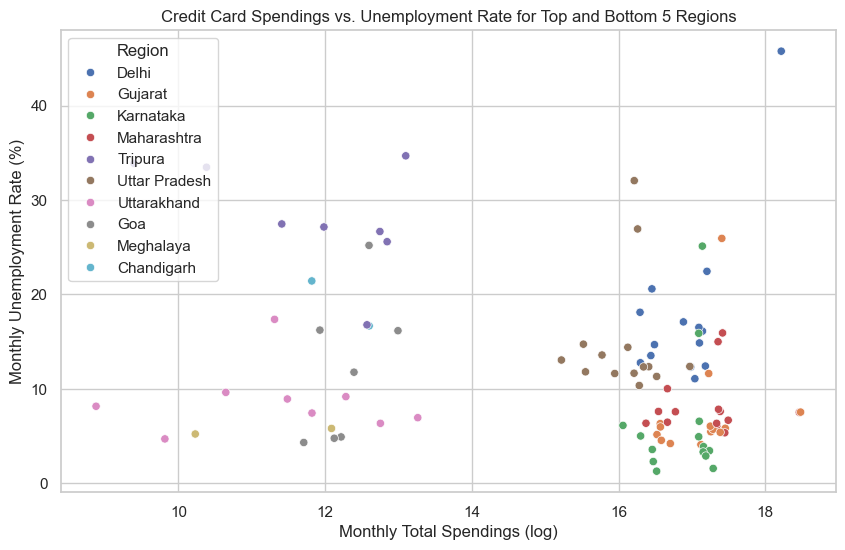

In [256]:
%matplotlib inline
plt.figure(figsize=(10, 6))
# Scatter plot
data = (
    df
    [
        df['Region'].isin(top_region_spendings + bottom_region_spendings)
    ]
    .assign(Amount=lambda x: np.log(x['Amount']))
)

sns.scatterplot(data=data, x='Amount', y='Unemployment Rate', hue='Region')

plt.title('Credit Card Spendings vs. Unemployment Rate for Top and Bottom 5 Regions')
plt.xlabel('Monthly Total Spendings (log)')
plt.ylabel('Monthly Unemployment Rate (%)')

plt.show()

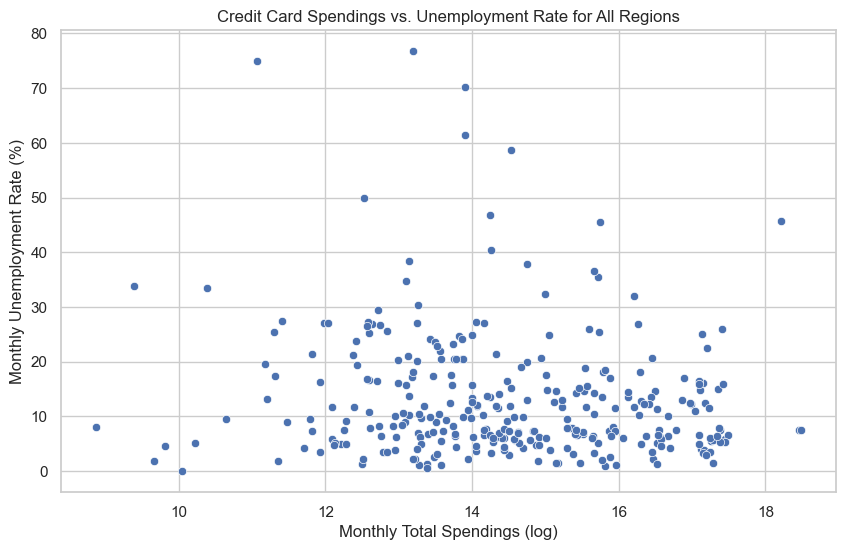

In [257]:
# For all regions
%matplotlib inline
plt.figure(figsize=(10, 6))
# Scatter plot
data = (
    df
    .assign(Amount=lambda x: np.log(x['Amount']))
)

# sns.scatterplot(data=data, x='Amount', y='Unemployment Rate', hue='Region')
sns.scatterplot(data=data, x='Amount', y='Unemployment Rate')

plt.title('Credit Card Spendings vs. Unemployment Rate for All Regions')
plt.xlabel('Monthly Total Spendings (log)')
plt.ylabel('Monthly Unemployment Rate (%)')

plt.show()

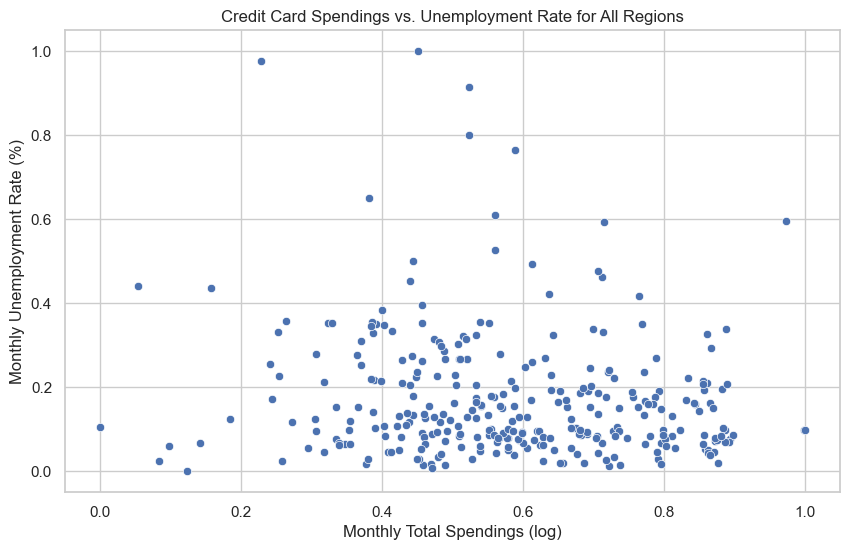

In [230]:
from sklearn.preprocessing import MinMaxScaler

scaler_amount = MinMaxScaler()
scaler_unemployment = MinMaxScaler()



%matplotlib inline
plt.figure(figsize=(10, 6))
# Scatter plot
data = (
    df
    .assign(Amount=lambda x: scaler_amount.fit_transform(np.log(x['Amount'].values).reshape(-1, 1)))
    .assign(Unemployment_Rate=lambda x: scaler_unemployment.fit_transform(x['Unemployment Rate'].values.reshape(-1, 1)))
)

# sns.scatterplot(data=data, x='Amount', y='Unemployment Rate', hue='Region')
sns.scatterplot(data=data, x='Amount', y='Unemployment_Rate')

plt.title('Credit Card Spendings vs. Unemployment Rate for All Regions')
plt.xlabel('Monthly Total Spendings (log)')
plt.ylabel('Monthly Unemployment Rate (%)')

plt.show()

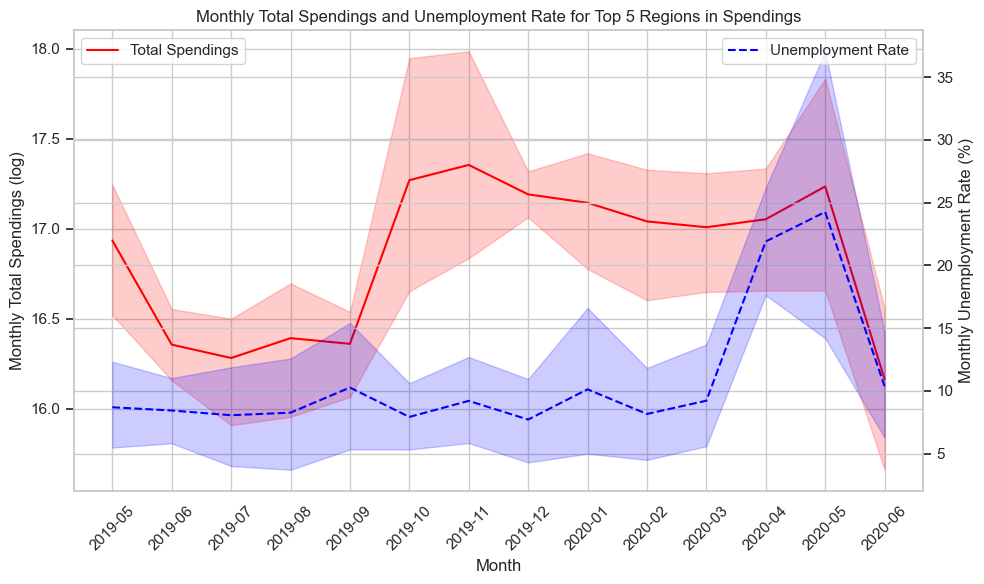

In [303]:
# Monthly lines
%matplotlib inline

cities = top_region_spendings

data = (
    df[
        df['Region'].isin(cities)
    ]
    .assign(Amount=lambda x: np.log(x['Amount']))
    .assign(Month=lambda x: x['Month'].dt.strftime('%Y-%m'))
)

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=data, x='Month', y='Amount',  ax=ax1, linestyle='solid', color='red', legend='full')
ax1.set_ylabel('Monthly Total Spendings (log)')
ax1.set_xlabel('Month')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(['Total Spendings'], loc='upper left')


ax2 = ax1.twinx()
sns.lineplot(data=data, x='Month', y='Unemployment Rate', ax=ax2, linestyle='dashed', color='blue')
ax2.set_ylabel('Monthly Unemployment Rate (%)')
ax2.legend(['Unemployment Rate'], loc='upper right')

plt.title('Monthly Total Spendings and Unemployment Rate for Top 5 Regions in Spendings')
fig.tight_layout()  
plt.show()


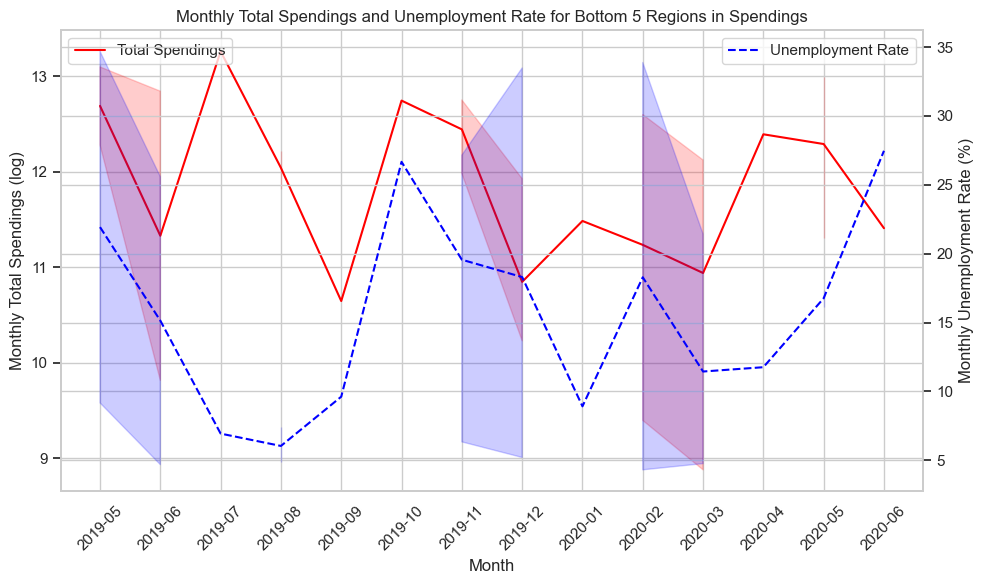

In [305]:
# Monthly lines
%matplotlib inline

cities = bottom_region_spendings

data = (
    df[
        df['Region'].isin(cities)
    ]
    .assign(Amount=lambda x: np.log(x['Amount']))
    .assign(Month=lambda x: x['Month'].dt.strftime('%Y-%m'))
)

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=data, x='Month', y='Amount',  ax=ax1, linestyle='solid', color='red', legend='full')
ax1.set_ylabel('Monthly Total Spendings (log)')
ax1.set_xlabel('Month')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(['Total Spendings'], loc='upper left')


ax2 = ax1.twinx()
sns.lineplot(data=data, x='Month', y='Unemployment Rate', ax=ax2, linestyle='dashed', color='blue')
ax2.set_ylabel('Monthly Unemployment Rate (%)')
ax2.legend(['Unemployment Rate'], loc='upper right')

plt.title('Monthly Total Spendings and Unemployment Rate for Bottom 5 Regions in Spendings')
fig.tight_layout()  
plt.show()

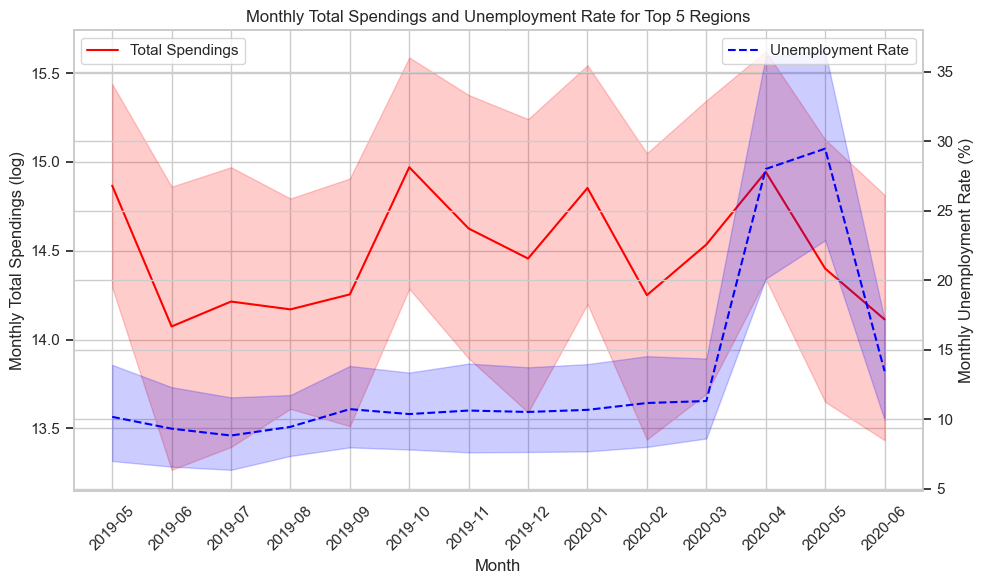

In [301]:
# Monthly lines
%matplotlib inline

cities = top_region_spendings

data = (
    df
        # [
        #     df['Region'].isin(cities)
        # ]
    .assign(Amount=lambda x: np.log(x['Amount']))
    .assign(Month=lambda x: x['Month'].dt.strftime('%Y-%m'))
)

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=data, x='Month', y='Amount',  ax=ax1, linestyle='solid', color='red', legend='full')
ax1.set_ylabel('Monthly Total Spendings (log)')
ax1.set_xlabel('Month')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(['Total Spendings'], loc='upper left')


ax2 = ax1.twinx()
sns.lineplot(data=data, x='Month', y='Unemployment Rate', ax=ax2, linestyle='dashed', color='blue')
ax2.set_ylabel('Monthly Unemployment Rate (%)')
ax2.legend(['Unemployment Rate'], loc='upper right')

plt.title('Monthly Total Spendings and Unemployment Rate for Top 5 Regions')
fig.tight_layout()  
plt.show()